In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import requests
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset from local file
df = pd.read_csv(r"D:\Dataset\complaints.csv")


df

C:\Users\RAGHAVENDRA\AppData\Local\Temp\ipykernel_14444\992706751.py:18: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Dataset\complaints.csv")


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-01-29,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,NY,12543,NaN,NaN,Web,2025-01-29,In progress,Yes,NaN,11825440
1,2025-01-30,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,NV,89148,NaN,NaN,Web,2025-01-30,In progress,Yes,NaN,11844247
2,2025-01-29,"Payday loan, title loan, personal loan, or adv...",Installment loan,Problem when making payments,NaN,NaN,NaN,TD BANK US HOLDING COMPANY,FL,33055,NaN,NaN,Phone,2025-02-04,In progress,Yes,NaN,11824206
3,2025-01-27,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,Resurgent Capital Services L.P.,NC,27455,NaN,NaN,Postal mail,2025-01-27,In progress,Yes,NaN,11799137
4,2025-01-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,IL,60609,NaN,NaN,Web,2025-01-28,In progress,Yes,NaN,11810502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848312,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
7848313,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858
7848314,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
7848315,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118


In [2]:
#unique labels present in the product column
print(df['Product'].unique())


['Credit reporting or other personal consumer reports'
 'Payday loan, title loan, personal loan, or advance loan' 'Mortgage'
 'Debt collection' 'Money transfer, virtual currency, or money service'
 'Credit card' 'Student loan'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Checking or savings account' 'Prepaid card' 'Vehicle loan or lease'
 'Debt or credit management' 'Consumer Loan' 'Credit reporting'
 'Payday loan' 'Credit card or prepaid card' 'Bank account or service'
 'Payday loan, title loan, or personal loan' 'Money transfers'
 'Other financial service' 'Virtual currency']


In [3]:
# Displaying column names and data types
print(" Column Names and Data Types:", df.dtypes)




 Column Names and Data Types: Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


In [4]:
# Display number of columns
print(" Number of Columns:", df.shape[1])



 Number of Columns: 18


In [5]:
# Display basic statistics for numeric columns
print("Dataset Summary Numerical Columns:", df.describe())

Dataset Summary Numerical Columns:        Complaint ID
count  7.848317e+06
mean   6.969995e+06
std    3.237025e+06
min    1.000000e+00
25%    4.110928e+06
50%    7.337147e+06
75%    9.744908e+06
max    1.215822e+07


In [6]:
#category mapping as given 
category_mapping = {
    'Credit reporting, credit repair services, or other personal consumer reports': 0,
    'Credit reporting': 0,  
    'Debt collection': 1,
    'Consumer Loan': 2,
    'Mortgage': 3
}





In [7]:
#unique product categories in the dataset
print("Unique Product Categories:\n", df['Product'].unique())

Unique Product Categories:
 ['Credit reporting or other personal consumer reports'
 'Payday loan, title loan, personal loan, or advance loan' 'Mortgage'
 'Debt collection' 'Money transfer, virtual currency, or money service'
 'Credit card' 'Student loan'
 'Credit reporting, credit repair services, or other personal consumer reports'
 'Checking or savings account' 'Prepaid card' 'Vehicle loan or lease'
 'Debt or credit management' 'Consumer Loan' 'Credit reporting'
 'Payday loan' 'Credit card or prepaid card' 'Bank account or service'
 'Payday loan, title loan, or personal loan' 'Money transfers'
 'Other financial service' 'Virtual currency']


In [8]:
# Filter dataset for relevant categories
df = df[df['Product'].isin(category_mapping.keys())]
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
7,2025-01-28,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Trying to communicate with the company to fix ...,NaN,NaN,"NEXA Mortgage, LLC",CA,95370,NaN,NaN,Phone,2025-02-06,In progress,Yes,NaN,11805339
10,2025-01-09,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Servicing Solutions, LLC",IL,60025,Older American,NaN,Web,2025-02-05,Closed with explanation,Yes,NaN,11439794
17,2018-05-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",LA,70002,NaN,Consent not provided,Web,2018-05-26,Closed with explanation,Yes,NaN,2918917
24,2025-01-27,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"CCS Financial Services, Inc.",FL,33056,Servicemember,NaN,Web,2025-02-07,In progress,Yes,NaN,11783258
25,2025-01-27,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",IL,62223,NaN,Consent not provided,Web,2025-02-07,Closed with explanation,Yes,NaN,11786936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848312,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374
7848313,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858
7848314,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835
7848315,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118


In [10]:
df = df[df['Product'].isin(category_mapping.keys())].copy()
df['Label'] = df['Product'].map(category_mapping)


In [11]:
# Display count of each category
print("Complaint Count per Category:", df['Label'].value_counts())

Complaint Count per Category: 0    2304293
1     711906
3     414704
2      31574
Name: Label, dtype: int64


In [12]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Label
7,2025-01-28,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Trying to communicate with the company to fix ...,NaN,NaN,"NEXA Mortgage, LLC",CA,95370,NaN,NaN,Phone,2025-02-06,In progress,Yes,NaN,11805339,3
10,2025-01-09,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"Servicing Solutions, LLC",IL,60025,Older American,NaN,Web,2025-02-05,Closed with explanation,Yes,NaN,11439794,1
17,2018-05-26,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",LA,70002,NaN,Consent not provided,Web,2018-05-26,Closed with explanation,Yes,NaN,2918917,0
24,2025-01-27,Debt collection,I do not know,Attempts to collect debt not owed,Debt was paid,NaN,NaN,"CCS Financial Services, Inc.",FL,33056,Servicemember,NaN,Web,2025-02-07,In progress,Yes,NaN,11783258,1
25,2025-01-27,Debt collection,I do not know,False statements or representation,Attempted to collect wrong amount,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",IL,62223,NaN,Consent not provided,Web,2025-02-07,Closed with explanation,Yes,NaN,11786936,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848312,2016-09-08,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting my free annual report,NaN,NaN,"EQUIFAX, INC.",FL,32853,NaN,Consent not provided,Web,2016-09-08,Closed with explanation,Yes,Yes,2102374,0
7848313,2022-06-06,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,93638,NaN,Consent not provided,Web,2022-06-06,Closed with explanation,Yes,NaN,5637858,0
7848314,2016-07-14,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",NJ,08620,"Older American, Servicemember",NaN,Phone,2016-07-14,Closed with explanation,Yes,No,2012835,0
7848315,2014-03-03,Credit reporting,NaN,Improper use of my credit report,Report improperly shared by CRC,NaN,NaN,"EQUIFAX, INC.",NJ,08759,NaN,NaN,Web,2014-03-04,Closed with explanation,Yes,No,740118,0


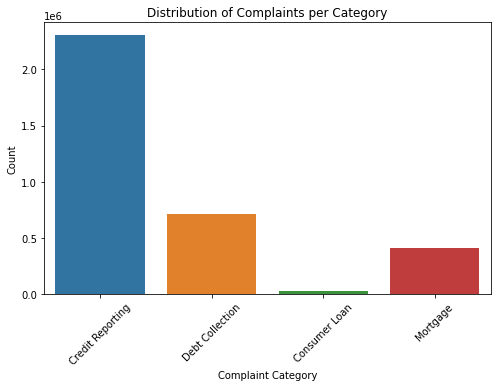

In [14]:
# Plot category distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Label'])
plt.xticks(ticks=[0, 1, 2, 3], labels=['Credit Reporting', 'Debt Collection', 'Consumer Loan', 'Mortgage'], rotation=45)
plt.xlabel("Complaint Category")
plt.ylabel("Count")
plt.title("Distribution of Complaints per Category")
plt.show()

In [15]:
#class 0 i.e credit reporting is dominating other classes,undersampling is applied
from sklearn.utils import resample

# Determine the minimum class size (i.e., the smallest class count)
min_class_size = df['Label'].value_counts().min()

# Separate each class
df_0 = df[df['Label'] == 0]
df_1 = df[df['Label'] == 1]
df_2 = df[df['Label'] == 2]
df_3 = df[df['Label'] == 3]

# Undersample the majority classes to match the smallest class size
df_0_resampled = resample(df_0, replace=False, n_samples=min_class_size, random_state=42)
df_1_resampled = resample(df_1, replace=False, n_samples=min_class_size, random_state=42)
df_3_resampled = resample(df_3, replace=False, n_samples=min_class_size, random_state=42)

# Combine the undersampled dataframes
df_balanced = pd.concat([df_0_resampled, df_1_resampled, df_2, df_3_resampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_balanced['Label'].value_counts())

# Proceed with further processing on df_balanced


1    31574
0    31574
3    31574
2    31574
Name: Label, dtype: int64


In [16]:
df_balanced

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Label
0,2025-01-26,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,Resurgent Capital Services L.P.,NJ,075XX,Servicemember,NaN,Web,2025-01-28,Closed with explanation,Yes,NaN,11731280,1
1,2016-01-08,Debt collection,Payday loan,Communication tactics,Threatened to take legal action,NaN,Company believes complaint caused principally ...,"EZCORP, INC.",TX,78702,NaN,NaN,Phone,2016-01-13,Closed with explanation,Yes,No,1734641,1
2,2014-10-27,Credit reporting,NaN,Unable to get credit report/credit score,Problem getting report or credit score,NaN,NaN,"EQUIFAX, INC.",CA,90034,NaN,NaN,Web,2014-10-27,Closed with explanation,Yes,Yes,1090910,0
3,2024-06-12,Debt collection,I do not know,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,Resurgent Capital Services L.P.,TX,75150,NaN,Consent not provided,Web,2024-06-12,Closed with explanation,Yes,NaN,9245846,1
4,2012-12-21,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",FL,33066,Servicemember,NaN,Referral,2012-12-27,Closed with explanation,Yes,No,215320,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126291,2013-03-07,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,94582,NaN,NaN,Referral,2013-03-08,Closed with explanation,Yes,Yes,344192,3
126292,2024-11-01,Mortgage,VA mortgage,Incorrect information on your report,Information is missing that should be on the r...,NaN,NaN,"PLANET HOME LENDING, LLC",NM,87144,"Older American, Servicemember",NaN,Phone,2024-11-01,Closed with explanation,Yes,NaN,10655779,3
126293,2022-06-16,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",TX,78222,NaN,Consent not provided,Web,2022-06-16,Closed with explanation,Yes,NaN,5678144,0
126294,2019-08-28,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CO,80132,NaN,Consent not provided,Web,2019-08-28,Closed with non-monetary relief,Yes,NaN,3356239,0


In [18]:
#model selection 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert text into TF-IDF features
df_balanced['Consumer complaint narrative'].fillna('', inplace=True)  # Replace NaN with empty string
X_tfidf = tfidf.fit_transform(df_balanced['Consumer complaint narrative'])
y = df_balanced['Label']

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train & Evaluate Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("=== Naive Bayes Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))





=== Naive Bayes Model ===
Accuracy: 0.4406967537608868
              precision    recall  f1-score   support

           0       0.30      0.93      0.46      6130
           1       0.86      0.32      0.46      6422
           2       0.76      0.26      0.38      6363
           3       0.90      0.27      0.42      6345

    accuracy                           0.44     25260
   macro avg       0.71      0.45      0.43     25260
weighted avg       0.71      0.44      0.43     25260



In [19]:

# Train & Evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("=== Logistic Regression Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))




=== Logistic Regression Model ===
Accuracy: 0.4765637371338084
              precision    recall  f1-score   support

           0       0.82      0.31      0.45      6130
           1       0.86      0.36      0.51      6422
           2       0.33      0.95      0.49      6363
           3       0.93      0.28      0.43      6345

    accuracy                           0.48     25260
   macro avg       0.74      0.48      0.47     25260
weighted avg       0.74      0.48      0.47     25260



In [20]:
# Train & Evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest Model ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest Model ===
Accuracy: 0.4697545526524149
              precision    recall  f1-score   support

           0       0.84      0.30      0.44      6130
           1       0.82      0.37      0.51      6422
           2       0.33      0.94      0.48      6363
           3       0.91      0.27      0.42      6345

    accuracy                           0.47     25260
   macro avg       0.72      0.47      0.46     25260
weighted avg       0.72      0.47      0.46     25260



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the model
lr = LogisticRegression(max_iter=1000, solver='liblinear')

#the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2']  # L1 (Lasso) or L2 (Ridge)
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

#best model
best_lr = grid_search.best_estimator_

# Evaluate on test data
y_pred_lr = best_lr.predict(X_test)

# Print Results
print("=== Best Logistic Regression Model ===")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


=== Best Logistic Regression Model ===
Best Parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.47731591448931115
              precision    recall  f1-score   support

           0       0.83      0.31      0.45      6130
           1       0.86      0.36      0.51      6422
           2       0.33      0.96      0.49      6363
           3       0.93      0.28      0.42      6345

    accuracy                           0.48     25260
   macro avg       0.74      0.48      0.47     25260
weighted avg       0.74      0.48      0.47     25260



In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Random Forest model
rf = RandomForestClassifier(random_state=42)

#hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, None],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf
}

# Grid Search with Cross-Validation
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

#The best model
best_rf = grid_search_rf.best_estimator_

# Evaluate on test data
y_pred_rf = best_rf.predict(X_test)

#Results
print("=== Best Random Forest Model ===")
print("Best Parameters:", grid_search_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Best Random Forest Model ===
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.47209026128266035
              precision    recall  f1-score   support

           0       0.85      0.30      0.44      6130
           1       0.83      0.37      0.51      6422
           2       0.33      0.94      0.49      6363
           3       0.92      0.27      0.42      6345

    accuracy                           0.47     25260
   macro avg       0.73      0.47      0.46     25260
weighted avg       0.73      0.47      0.46     25260

